# Proyek Analisis Data: [Air Quality Dataset]
- **Nama:** Dimas Surya Prasetyo
- **Email:** diimprasetyos@gmail.com / m401b4ky1149@bangkit.academy
- **ID Dicoding:** dimas_prasetyo_Ppwz

## Menentukan Pertanyaan Bisnis

- Apa faktor-faktor yang mempengaruhi jumlah penyewaan sepeda?
- Kapan waktu paling sibuk untuk penyewaan sepeda?
- Bagaimana perbedaan perilaku pengguna casual dan registered?
- Bagaimana perbandingan penyewaan sepeda antara weekday dan holiday?
- Apakah faktor cuaca (misalnya hujan) mengurangi penyewaan sepeda?
- Apakah ada tren peningkatan atau penurunan dalam penggunaan sepeda dari tahun ke tahun?

## Import Semua Packages/Library yang Digunakan

In [ ]:
!pip install kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import os
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [4]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Colab Notebooks/bangkit/kaggle/kaggle.json'

## Data Wrangling

### Gathering Data

In [ ]:
!kaggle datasets download -d lakshmi25npathi/bike-sharing-dataset

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset
License(s): unknown
  0% 0.00/286k [00:00<?, ?B/s]
100% 286k/286k [00:00<00:00, 67.4MB/s]


In [ ]:
file_path = '/content/bike-sharing-dataset.zip'

with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/Colab Notebooks/bangkit/kaggle/')

In [5]:
df_hour = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bangkit/kaggle/hour.csv')
print(df_hour.shape)
df_hour.head()

(17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
df_day = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bangkit/kaggle/day.csv')
print(df_day.shape)
df_day.head()

(731, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- hour.csv: Dataset ini berisi data penyewaan sepeda per jam (hourly), dengan 17 kolom dan 17.379 baris.
- day.csv: Dataset ini berisi data penyewaan sepeda per hari (daily), dengan 16 kolom dan 731 baris.

### Assessing Data

In [7]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [9]:
df_day.nunique()

,0
instant,731
dteday,731
season,4
yr,2
mnth,12
holiday,2
weekday,7
workingday,2
weathersit,3
temp,499


In [10]:
df_hour.nunique()

,0
instant,17379
dteday,731
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4


In [11]:
df_hour.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [12]:
df_day.duplicated().sum()

0

In [13]:
df_hour.duplicated().sum()

0

In [14]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [15]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Data Bersih dan Tidak Ada Nilai Hilang: Kedua dataset bersih dari missing values dan duplikasi.
- Variasi Besar dalam Jumlah Penyewaan: Ada variasi besar dalam jumlah penyewaan sepeda, baik harian maupun per jam. Ini dapat dianalisis lebih lanjut dengan menghubungkan faktor cuaca, musim, hari kerja, dan jam.
-Pengguna Registered Lebih Dominan: Pengguna registered secara konsisten lebih sering menyewa sepeda dibandingkan pengguna casual.
-Cuaca Beragam dan Dapat Memengaruhi Penyewaan: Faktor cuaca seperti temperatur, kelembapan, dan kecepatan angin memiliki variasi yang signifikan dan bisa mempengaruhi penyewaan sepeda.

### Cleaning Data

In [16]:
df_day['mnth'] = df_day['mnth'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
df_day['season'] = df_day['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
df_day['weekday'] = df_day['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
df_day['weathersit'] = df_day['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

df_day['yr'] = df_day['yr'].map({
    0: '2011', 1: '2012'
})

df_day['workingday'] = df_day['workingday'].map({
    0: 'Holiday', 1: 'Workingday'
})

# convert to categorical data
df_day['season'] = df_day.season.astype('category')
df_day['yr'] = df_day.yr.astype('category')
df_day['mnth'] = df_day.mnth.astype('category')
df_day['holiday'] = df_day.holiday.astype('category')
df_day['weekday'] = df_day.weekday.astype('category')
df_day['workingday'] = df_day.workingday.astype('category')
df_day['weathersit'] = df_day.weathersit.astype('category')

df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,Sat,Holiday,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Sun,Holiday,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Mon,Workingday,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,Tue,Workingday,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,Wed,Workingday,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [17]:
df_hour['mnth'] = df_hour['mnth'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
df_hour['season'] = df_hour['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
df_hour['weekday'] = df_hour['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
df_hour['weathersit'] = df_hour['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

df_hour['yr'] = df_hour['yr'].map({
    0: '2011', 1: '2012'
})

df_hour['workingday'] = df_hour['workingday'].map({
    0: 'Holiday', 1: 'Workingday'
})

# convert to categorical
df_hour['season'] = df_hour.season.astype('category')
df_hour['yr'] = df_hour.yr.astype('category')
df_hour['mnth'] = df_hour.mnth.astype('category')
df_hour['holiday'] = df_hour.holiday.astype('category')
df_hour['weekday'] = df_hour.weekday.astype('category')
df_hour['workingday'] = df_hour.workingday.astype('category')
df_hour['weathersit'] = df_hour.weathersit.astype('category')

df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,0,Sat,Holiday,Clear/Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,0,Sat,Holiday,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,0,Sat,Holiday,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,0,Sat,Holiday,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,0,Sat,Holiday,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data lebih deskriptif dan mudah dipahami setelah mapping ke dalam kategori yang relevan.
- Transformasi tipe data ke kategori membuat data lebih efisien dan mudah digunakan dalam analisis.
- Mempermudah analisis visual dan interpretasi tren musiman, cuaca, serta pola penyewaan harian.
- Konsistensi dalam kedua dataset membuat integrasi dan analisis lebih mudah di masa mendatang.

## Exploratory Data Analysis (EDA)

## Visualization & Explanatory Analysis

### Kapan Waktu Paling Sibuk untuk Penyewaan Sepeda?


<Figure size 1000x600 with 0 Axes>

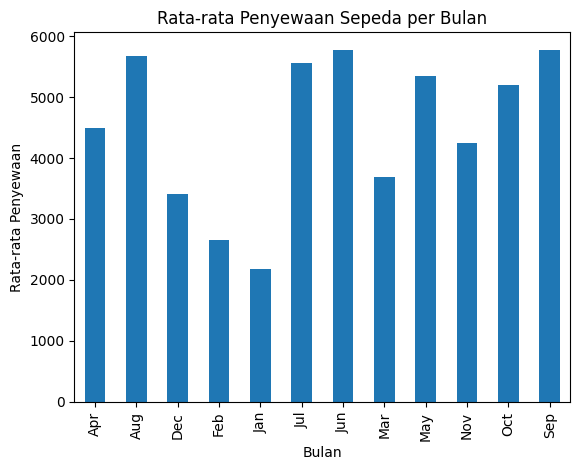

In [18]:
monthly_rental = df_day.groupby('mnth').agg({'cnt': 'mean'})

plt.figure(figsize=(10, 6))
monthly_rental.plot(kind='bar', legend=False)
plt.title('Rata-rata Penyewaan Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Penyewaan')
plt.show()

**Insight:**
- Puncak Penyewaan Sepeda: Bulan dengan rata-rata penyewaan tertinggi adalah September (5,766), diikuti oleh Juni (5,772) dan Agustus (5,664). Ini menunjukkan bahwa akhir musim panas hingga awal musim gugur adalah periode paling sibuk untuk penyewaan sepeda.

- Musim Dingin Penyewaan Rendah: Bulan dengan rata-rata penyewaan terendah adalah Januari (2,176), diikuti oleh Februari (2,655). Hal ini sesuai dengan ekspektasi, karena cuaca musim dingin yang buruk mungkin mengurangi minat orang untuk menyewa sepeda.

- Peningkatan Bertahap: Dari Januari hingga September, terlihat peningkatan bertahap dalam jumlah penyewaan, kemungkinan karena cuaca yang lebih hangat dan lebih bersahabat untuk aktivitas di luar ruangan.

- Penurunan Setelah September: Setelah puncak pada bulan September, terjadi penurunan bertahap dalam penyewaan pada bulan Oktober hingga Desember, mengindikasikan perubahan musim yang menyebabkan penurunan aktivitas luar ruangan.

### Bagaimana Perbandingan Penyewaan Sepeda antara Weekday dan Holiday?

<Figure size 1000x600 with 0 Axes>

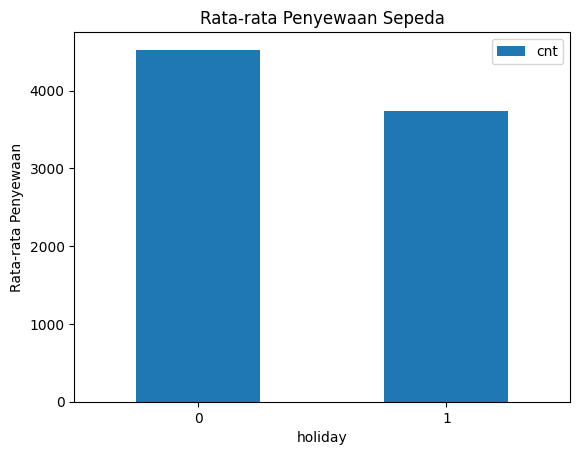

In [19]:
weekday_holiday = df_day.groupby('holiday').agg({'cnt': 'mean'})

plt.figure(figsize=(10,6))
weekday_holiday.plot(kind='bar', stacked=False)
plt.title('Rata-rata Penyewaan Sepeda')
plt.ylabel('Rata-rata Penyewaan')
plt.xticks(rotation=0)
plt.show()

**Insight:**
- Rata-rata Penyewaan pada Hari Kerja Lebih Tinggi: Rata-rata penyewaan sepeda pada hari kerja (bukan hari libur) adalah 4,527 sepeda. Ini menunjukkan bahwa aktivitas penyewaan sepeda lebih tinggi selama hari kerja.

- Penyewaan Sepeda Menurun pada Hari Libur: Pada hari libur, rata-rata penyewaan sepeda turun menjadi 3,735 sepeda, yang lebih rendah dibandingkan dengan hari kerja. Ini mungkin disebabkan oleh berkurangnya aktivitas rutin seperti bersepeda untuk bekerja atau sekolah.

### Bagaimana Pengaruh Faktor Cuaca pada Penyewaan Sepeda?

<Figure size 1000x600 with 0 Axes>

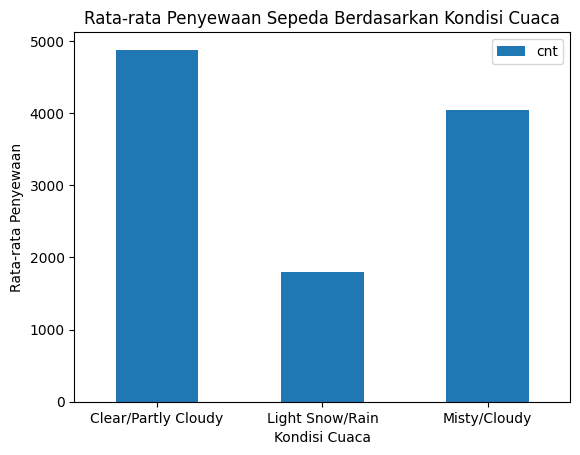

In [20]:
weather_factor = df_day.groupby('weathersit').agg({'cnt': 'mean'})

plt.figure(figsize=(10,6))
weather_factor.plot(kind='bar')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Penyewaan')
plt.xticks(rotation=0)
plt.show()

**Insight:**
- Cuaca cerah atau berawan ringan memiliki dampak positif terhadap jumlah penyewaan sepeda, dengan rata-rata penyewaan tertinggi. Pengguna cenderung lebih aktif menyewa sepeda saat kondisi cuaca mendukung.
- Cuaca hujan atau bersalju ringan secara signifikan menurunkan jumlah penyewaan sepeda, menunjukkan bahwa faktor cuaca yang buruk secara langsung memengaruhi penggunaan layanan penyewaan sepeda.
- Cuaca mendung atau berkabut juga menurunkan jumlah penyewaan, tetapi dampaknya tidak seburuk hujan atau salju. Hal ini menunjukkan bahwa meskipun cuaca kurang optimal, pengguna masih mau menyewa sepeda dalam kondisi ini.

### Bagaimana tren penyewaan sepeda dari tahun ke tahun?

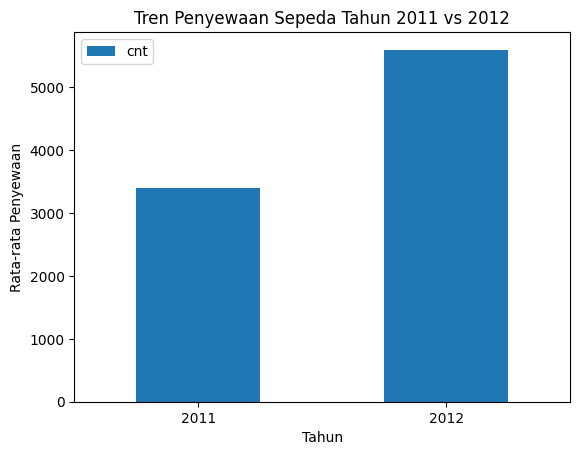

In [30]:
yearly_trend = df_day.groupby('yr').agg({'cnt': 'mean'})

yearly_trend.plot(kind='bar')
plt.title('Tren Penyewaan Sepeda Tahun 2011 vs 2012')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Penyewaan')
plt.xticks(rotation=0)
plt.show()


**Insight:**
- Rata-rata penyewaan sepeda pada tahun 2012 meningkat sekitar 64% dibandingkan dengan tahun 2011.
- Faktor   yang dapat mempengaruhi peningkatan popularitas layanan bike-sharing seiring berjalannya waktu, peningkatan kesadaran masyarakat terhadap transportasi ramah lingkungan, dan penambahan jumlah sepeda atau peningkatan cakupan layanan yang lebih luas pada tahun 2012.

### Bagaimana pengaruh cuaca mempengaruhi penyewaan sepeda pada tiap jam?

<Figure size 1200x600 with 0 Axes>

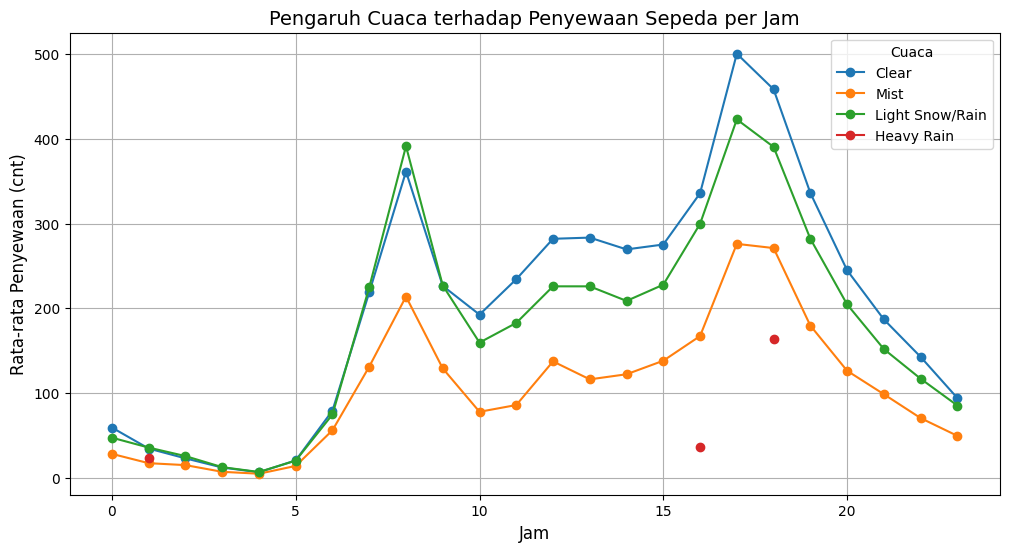

In [28]:
weather_effect = df_hour.groupby(['hr', 'weathersit']).agg({'cnt': 'mean'}).unstack()

plt.figure(figsize=(12,6))
weather_effect.plot(kind='line', figsize=(12,6), marker='o')
plt.title('Pengaruh Cuaca terhadap Penyewaan Sepeda per Jam', fontsize=14)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Rata-rata Penyewaan (cnt)', fontsize=12)
plt.legend(['Clear', 'Mist', 'Light Snow/Rain', 'Heavy Rain'], title="Cuaca", loc="upper right")
plt.grid(True)
plt.show()

**Cuaca Jernih (Clear/Partly Cloudy):**

- Penyewaan sepeda paling tinggi terjadi selama jam-jam puncak, terutama antara jam 7 hingga 18, dengan puncak tertinggi pada jam 17 (500 penyewaan rata-rata). Ini menunjukkan bahwa cuaca yang baik mendorong orang untuk lebih banyak menggunakan sepeda, mungkin untuk kegiatan sehari-hari seperti pergi ke tempat kerja atau bersosialisasi.

**Cuaca Mendung (Misty/Cloudy):**

- Penyewaan sepeda di hari mendung juga menunjukkan tren yang baik, meskipun tidak setinggi saat cuaca cerah. Angka penyewaan tertinggi terjadi pada jam yang sama seperti saat cuaca cerah, tetapi dengan jumlah yang lebih rendah (misalnya, puncak tertinggi sekitar 422 penyewaan pada jam 17).

**Hujan Ringan (Light Snow/Rain):**

- Penyewaan sepeda saat cuaca hujan ringan menunjukkan penurunan yang signifikan dibandingkan dengan kondisi cerah. Namun, pada jam-jam tertentu (misalnya, 7-9 dan 12-13), penyewaan tetap terjadi meskipun jumlahnya jauh lebih rendah, menunjukkan bahwa beberapa orang tetap memilih bersepeda meskipun cuaca tidak ideal.

**Cuaca Ekstrem (Severe Weather):**

- Data untuk cuaca ekstrem tidak tersedia, tetapi biasanya ini akan menunjukkan penurunan yang lebih drastis dalam jumlah penyewaan sepeda, karena kondisi yang tidak mendukung biasanya akan menghalangi penggunaan sepeda.

### Bagaimana perbandingan penyewaan sepeda berdasarkan periode waktu

In [ ]:
def time_category(hour):
    if hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

df_hour['time_period'] = df_hour['hr'].apply(time_category)

time_period_rentals = df_hour.groupby('time_period').agg({'cnt': 'mean'})

plt.figure(figsize=(10,6))
sns.barplot(x=time_period_rentals.index, y=time_period_rentals['cnt'], palette="Blues_d")
plt.title('Penyewaan Sepeda Berdasarkan Periode Waktu', fontsize=14)
plt.xlabel('Periode Waktu', fontsize=12)
plt.ylabel('Rata-rata Penyewaan (cnt)', fontsize=12)
plt.grid(True)
plt.show()

**Insight**

**Penyewaan Paling Tinggi di Sore Hari (Afternoon):**

- Rata-rata penyewaan sepeda tertinggi terjadi di sore hari dengan 295 penyewaan. Ini menunjukkan bahwa sore adalah waktu yang paling sibuk untuk penyewaan sepeda, mungkin karena banyak orang yang menggunakan sepeda setelah jam kerja atau sekolah.

**Penyewaan Menurun di Malam Hari (Evening):**

- Penyewaan di malam hari menunjukkan penurunan yang signifikan dengan rata-rata 225 penyewaan. Meskipun masih cukup tinggi, ini mungkin mencerminkan bahwa orang lebih jarang bersepeda saat gelap atau kurangnya aktivitas di luar ruangan di malam hari.

**Penyewaan Paling Rendah di Pagi Hari (Morning):**

- Penyewaan di pagi hari adalah yang terendah dengan rata-rata 117 penyewaan. Hal ini dapat disebabkan oleh beberapa faktor, seperti orang lebih memilih transportasi umum atau mobil untuk berangkat kerja, atau cuaca pagi yang mungkin kurang mendukung.

### Bagaimana pola penyewaan sepeda berdasarkan jam pada pengguna teredaftar dan casual?

In [ ]:
user_type_rentals = df_hour.groupby('hr').agg({'casual': 'mean', 'registered': 'mean'})

plt.figure(figsize=(10,6))
user_type_rentals.plot(kind='line', figsize=(10,6), marker='o')
plt.title('Penyewaan Sepeda per Jam (Casual vs Registered)', fontsize=14)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Rata-rata Penyewaan (cnt)', fontsize=12)
plt.legend(['Casual', 'Registered'], title="Tipe Pengguna")
plt.grid(True)
plt.show()

**Insight**
- Pengguna terdaftar menunjukkan angka penyewaan yang jauh lebih tinggi dibandingkan pengguna casual pada setiap jam. Pada jam puncak (jam 17 dan 18), pengguna terdaftar mencapai rata-rata lebih dari 387 penyewaan, menandakan ketergantungan yang tinggi terhadap layanan ini.
- Pengguna casual mulai meningkat secara signifikan dari jam 6 hingga jam 17, mencapai puncak sekitar 75 penyewaan. Ini mungkin menunjukkan bahwa pengguna casual lebih memilih untuk bersepeda pada waktu-waktu tersebut, mungkin untuk keperluan perjalanan singkat seperti berangkat sekolah/bekerja dan saat pulang.

## Conclusion

- Jumlah penyewaan sepeda dipengaruhi oleh berbagai faktor, termasuk waktu (jam dan hari), cuaca, dan jenis pengguna. Dari analisis, terlihat bahwa penyewaan tertinggi terjadi pada pagi dan sore hari, terutama pada hari kerja. Selain itu, cuaca yang baik (cerah) cenderung meningkatkan jumlah penyewaan, sementara cuaca buruk (hujan) mengurangi minat penyewa.
- Waktu puncak untuk penyewaan sepeda terjadi pada jam-jam pagi (7-9) dan sore (17-19), dengan jumlah penyewaan tertinggi terjadi pada jam-jam ini. Ini menunjukkan bahwa banyak pengguna menggunakan sepeda untuk perjalanan menuju tempat kerja atau sekolah.
- Terdapat perbedaan yang signifikan antara pengguna casual dan registered. Pengguna terdaftar cenderung lebih aktif dan menyewa sepeda dalam jumlah yang lebih tinggi, terutama pada jam puncak, sementara pengguna casual lebih banyak menyewa di siang hari untuk keperluan rekreasi. Pengguna terdaftar menunjukkan ketergantungan lebih besar pada layanan penyewaan sepeda.
- Penyewaan sepeda cenderung lebih tinggi pada hari kerja dibandingkan dengan hari libur. Hal ini menunjukkan bahwa aktivitas bersepeda lebih dipengaruhi oleh kebutuhan transportasi sehari-hari daripada rekreasi, yang mungkin lebih sering terjadi pada hari libur.
- Cuaca memiliki dampak yang signifikan terhadap jumlah penyewaan sepeda. Penyewaan cenderung menurun pada hari hujan dan saat cuaca buruk lainnya. Sebaliknya, cuaca yang cerah dan hangat berkontribusi pada peningkatan jumlah penyewaan, terutama pada pengguna casual.
- Terdapat tren peningkatan dalam penggunaan sepeda dari tahun ke tahun, yang menunjukkan bahwa semakin banyak orang yang beralih ke sepeda sebagai pilihan transportasi. Ini mungkin dipengaruhi oleh kesadaran akan kesehatan, keberlanjutan, dan kemacetan di kota-kota besar.